<a href="https://colab.research.google.com/github/minassy/ISID_2021/blob/main/210909_%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import glob
import pandas as pd
import numpy as np
import pathlib
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#作業基本ディレクトリ
DIR = 'drive/MyDrive/00_Competition/ISID/2021'
os.listdir(DIR)
#os.mkdir(DIR+'/data')

['data',
 '210904_学習データの読み込み.ipynb',
 '210906_EDA_train.ipynb',
 '210908_EDA_test.ipynb',
 '210908_テストデータの読み込み_作成.ipynb',
 '210909_特徴量エンジニアリング.ipynb']

In [3]:
#データの読み込み
df_0 = pd.read_csv(
    os.path.join(DIR, 'data', 'Train_Unit_20210903', 'dataset_train_all.csv'),
    encoding='utf-8')

In [4]:
#不必要なIndex列と空白列を削除。
df_0 = df_0.drop(df_0.columns[[0, 7]], axis=1)

In [5]:
#データ処理用にDFをコピー
df = df_0.copy()

In [6]:
#カラム名変更前後の辞書
col_list = {'Time (s)' : 'Time',
            'Voltage Measured (V)' : 'VM',
            'Voltage Charge (V)' : 'VC',
            'Current Measured (Amps)' : 'CM', 
            'Current Charge (Amps)' : 'CC',
            'Temperature (degree C)': 'Temp', 
            'unit' : 'unit_name', 
            'charge_mode' : 'mode', 
            'Cycle_num' : 'Cycle',
            'Voltage Load (V)' : 'VL',
            'Current Load (Amps)' : 'CL'
}

In [7]:
df = df.rename(columns=col_list)

In [8]:
DIR_DATA_TRAIN = os.path.join(DIR, 'data', 'Train_Unit_20210903')
for folder in os.listdir(DIR_DATA_TRAIN)[:3]:
  for C in os.listdir(os.path.join(DIR_DATA_TRAIN, folder)):
    files = glob.glob(os.path.join(DIR_DATA_TRAIN, folder, C, '*.csv'))
    print(f'{folder}','--',f'{C}のサイクル数：',len(files))

Train_Unit_3 -- Chargeのサイクル数： 97
Train_Unit_3 -- Dischargeのサイクル数： 97
Train_Unit_2 -- Chargeのサイクル数： 40
Train_Unit_2 -- Dischargeのサイクル数： 40
Train_Unit_1 -- Chargeのサイクル数： 124
Train_Unit_1 -- Dischargeのサイクル数： 124


In [9]:
df.head()

,Time,VM,VC,CM,CC,Temp,unit_name,mode,Cycle,VL,CL
0,0.000,3.6927,0.003,-0.004495,0.000,25.663,Train_Unit_3,Charge,90,NaN,NaN
1,2.453,3.1721,1.462,-3.573100,-3.563,25.660,Train_Unit_3,Charge,90,NaN,NaN
2,8.921,3.8846,4.618,1.505800,1.498,25.743,Train_Unit_3,Charge,90,NaN,NaN
3,15.156,3.9054,4.650,1.506600,1.500,25.835,Train_Unit_3,Charge,90,NaN,NaN
4,21.750,3.9165,4.661,1.509000,1.500,25.884,Train_Unit_3,Charge,90,NaN,NaN


# 特徴量エンジニアリング

【対象カラム】  
充電：VM、CM、VC  
放電：VM、VL

In [10]:
#サンプル波形の取得(ユニット1、)
exp = df[(df['unit_name'] == 'Train_Unit_1') & (df['Cycle'] == 1)]

In [11]:
exp.head()

,Time,VM,VC,CM,CC,Temp,unit_name,mode,Cycle,VL,CL
669684,0.000,3.3251,0.003,0.000302,-0.002,29.342,Train_Unit_1,Charge,1,NaN,NaN
669685,2.516,3.0020,1.414,-3.362000,-3.370,29.336,Train_Unit_1,Charge,1,NaN,NaN
669686,5.500,3.4346,4.142,1.508700,1.498,29.335,Train_Unit_1,Charge,1,NaN,NaN
669687,8.391,3.4549,4.180,1.510000,1.498,29.342,Train_Unit_1,Charge,1,NaN,NaN
669688,11.266,3.4688,4.196,1.508700,1.498,29.331,Train_Unit_1,Charge,1,NaN,NaN


# ①充電：VM

In [12]:
exp_c_vm = exp[['Time', 'VM']][exp['mode'] == 'Charge']

In [13]:
exp_c_vm = exp_c_vm.reset_index(drop=True)
exp_c_vm.head()

,Time,VM
0,0.000,3.3251
1,2.516,3.0020
2,5.500,3.4346
3,8.391,3.4549
4,11.266,3.4688


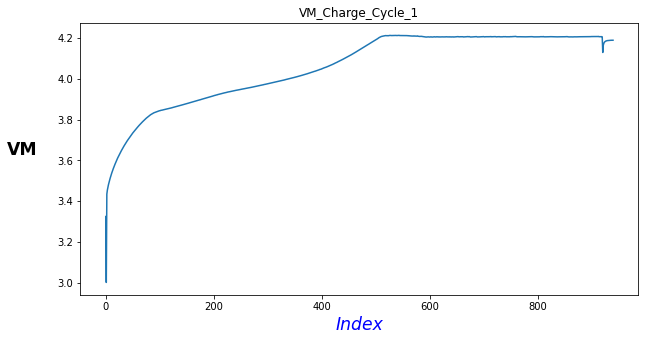

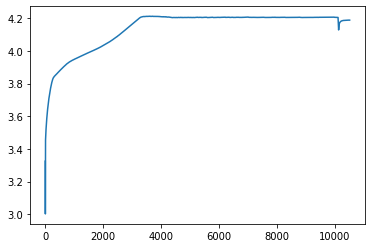

In [14]:
#オブジェクト指向的な可視化
fig, ax = plt.subplots()

fig.set_figwidth(10)#幅
fig.set_figheight(5)#高さ

ax.plot(exp_c_vm.index, exp_c_vm['VM'], label='VM')
ax.set_title('VM_Charge_Cycle_1')
ax.set_xlabel('Index', style='italic', size='xx-large', color='blue')
ax.set_ylabel('VM', labelpad=35, weight='bold', size='xx-large', rotation='horizontal')

fig1, ax1 = plt.subplots()
ax1.plot(exp_c_vm['Time'], exp_c_vm['VM'], label='VM')

#y_min = 0
#y_max = exp_c_vm['VM'].max()
#x_min = 0
#x_max = exp_c_vm.index.max()

#ax.set_xlim(x_min, x_max + 10)
#ax.set_ylim(y_min, y_max + 0.5)

#ax.set_xticks(np.arange(x_min-10, x_max, step=50))
#ax.set_yticks(np.arange(y_min, y_max, step=0.5))

#ax.axvline(x=3608.8)

plt.show()

In [15]:
exp_c_vm.head(10)

,Time,VM
0,0.000,3.3251
1,2.516,3.0020
2,5.500,3.4346
3,8.391,3.4549
4,11.266,3.4688
5,14.141,3.4810
6,17.031,3.4919
7,19.906,3.5019
8,22.797,3.5114
9,25.672,3.5204


In [16]:
#点P_C_VM：飽和点
#飽和度合いの確認。5行前と差分を取る。0.001に達したら飽和してそう。
tmp = exp_c_vm.loc[:, 'VM'].diff(5)
tmp.tail(10)

930    0.0039
931    0.0026
932    0.0025
933    0.0013
934    0.0012
935    0.0009
936    0.0008
937    0.0008
938    0.0007
939    0.0005
Name: VM, dtype: float64

In [17]:
#LAG=5が0.001未満が続くところを、飽和領域とみなす。
P_C_VM = exp_c_vm.loc[:, 'VM'][exp_c_vm.loc[:, 'VM'].diff(5) < 0.001]
#飽和領域のなかで、最初の点を点P_C_VMとする。
P_C_VM = P_C_VM.reset_index(inplace=False)
P_C_VM = P_C_VM['index'].iloc[0]
P_C_VM

520

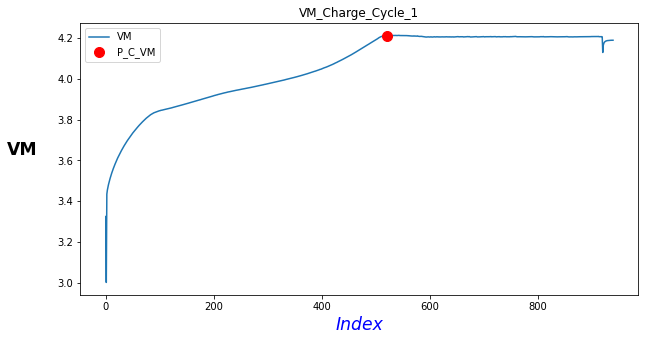

In [18]:
#点にマーカーを付ける。
fig, ax = plt.subplots()

fig.set_figwidth(10)#幅
fig.set_figheight(5)#高さ

ax.plot(exp_c_vm.index, exp_c_vm['VM'], label='VM')
ax.set_title('VM_Charge_Cycle_1')
ax.set_xlabel('Index', style='italic', size='xx-large', color='blue')
ax.set_ylabel('VM', labelpad=35, weight='bold', size='xx-large', rotation='horizontal')

ax.plot(P_C_VM, exp_c_vm.loc[P_C_VM, 'VM'], 'ro', ms=10, label='P_C_VM')

ax.legend()
plt.show();

In [19]:
#充電VMの特徴量は、点P_C_VMにおける時間
Feature_VM = exp_c_vm['Time'].loc[P_C_VM]
Feature_VM

3422.5

# ②充電：CM

In [20]:
exp_c_cm = exp[['Time', 'CM']][exp['mode'] == 'Charge']
exp_c_cm = exp_c_cm.reset_index(drop=True)
exp_c_cm.head()

,Time,CM
0,0.000,0.000302
1,2.516,-3.362000
2,5.500,1.508700
3,8.391,1.510000
4,11.266,1.508700


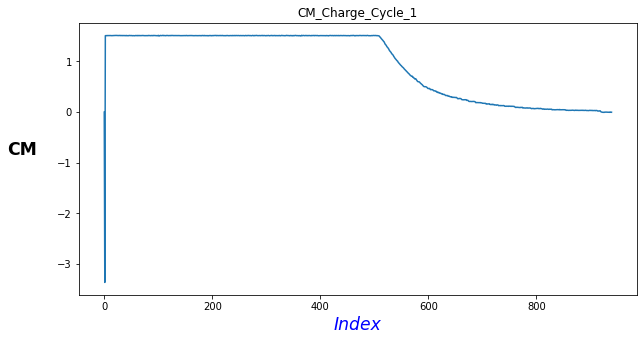

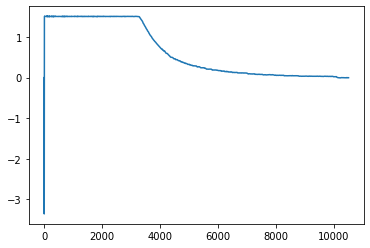

In [21]:
#オブジェクト指向的な可視化
fig, ax = plt.subplots()

fig.set_figwidth(10)#幅
fig.set_figheight(5)#高さ

ax.plot(exp_c_cm.index, exp_c_cm['CM'], label='CM')
ax.set_title('CM_Charge_Cycle_1')
ax.set_xlabel('Index', style='italic', size='xx-large', color='blue')
ax.set_ylabel('CM', labelpad=35, weight='bold', size='xx-large', rotation='horizontal')

fig1, ax1 = plt.subplots()
ax1.plot(exp_c_cm['Time'], exp_c_cm['CM'], label='VM')

plt.show()

In [22]:
#点P_C_CM：立ち下がりの開始点
#5行前と差分を取って確認。
tmp_cm = exp_c_cm.loc[:, 'CM'].diff(5)
tmp_cm.head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    1.511298
6    4.871200
7    0.003500
8    0.000200
9    0.002400
Name: CM, dtype: float64

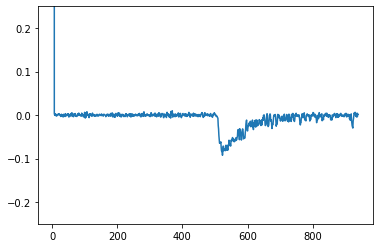

In [23]:
#差分プロットの図示
fig, ax = plt.subplots()
ax.plot(tmp_cm.index, tmp_cm)
ax.set_ylim(-0.25, 0.25)
plt.show()

In [24]:
#LAG=5の最低点
tmp_cm.argmin()

523

In [25]:
#勾配が負で最小となるインデックスを取得
cm_grad_min = np.gradient(tmp_cm[10:]).argmin()
cm_grad_min
#fig, ax = plt.subplots()
#ax.plot(cm_grad_min)
#plt.show()

502

In [26]:
#飽和領域からの立ち下がり点(LAG=5の勾配が最小となる点)を点P_C_CMとする。
P_C_CM = np.gradient(exp_c_cm.loc[:, 'CM'].diff(5)[10:]).argmin()
P_C_CM

502

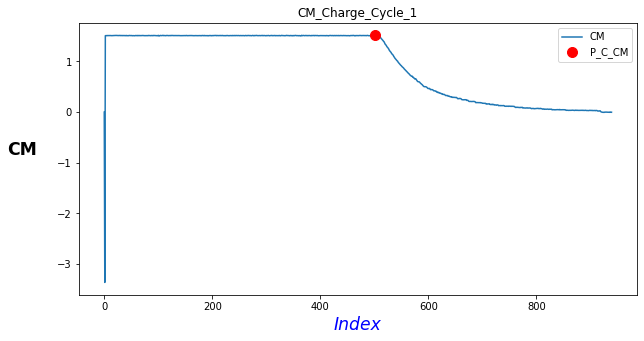

In [27]:
#点にマーカーを付ける。
fig, ax = plt.subplots()

fig.set_figwidth(10)#幅
fig.set_figheight(5)#高さ

ax.plot(exp_c_cm.index, exp_c_cm['CM'], label='CM')
ax.set_title('CM_Charge_Cycle_1')
ax.set_xlabel('Index', style='italic', size='xx-large', color='blue')
ax.set_ylabel('CM', labelpad=35, weight='bold', size='xx-large', rotation='horizontal')

ax.plot(P_C_CM, exp_c_cm.loc[P_C_CM, 'CM'], 'ro', ms=10, label='P_C_CM')

ax.legend()
plt.show();

In [28]:
#充電CMの特徴量は、点P_C_CMにおける時間
Feature_CM = exp_c_cm['Time'].loc[P_C_CM]
Feature_CM

3207.4

# ③充電：VC

In [29]:
exp_c_vc = exp[['Time', 'VC']][exp['mode'] == 'Charge']
exp_c_vc = exp_c_vc.reset_index(drop=True)
exp_c_vc.head()

,Time,VC
0,0.000,0.003
1,2.516,1.414
2,5.500,4.142
3,8.391,4.180
4,11.266,4.196


In [30]:
def viz(feature, data):
  fig, ax = plt.subplots()

  fig.set_figwidth(10)#幅
  fig.set_figheight(5)#高さ

  ax.plot(data.index, data[feature], label=feature)
  ax.set_title(f'{feature}_Charge_Cycle_1')
  ax.set_xlabel('Index', style='italic', size='xx-large', color='blue')
  ax.set_ylabel(feature, labelpad=35, weight='bold', size='xx-large', rotation='horizontal')

  fig1, ax1 = plt.subplots()
  ax1.plot(data['Time'], data[feature], label=feature)

  plt.show()

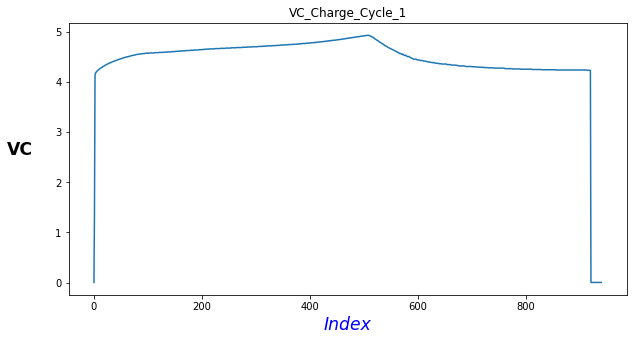

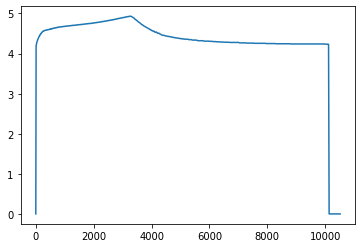

In [31]:
#可視化
feature = 'VC'
data = exp_c_vc

viz(feature, data)

In [32]:
#VCが最大値を示す点を、点P_C_VCとする。
P_C_VC = exp_c_vc.VC.argmax()
P_C_VC

505

In [33]:
def viz_marker(feature, data, P):
  fig, ax = plt.subplots()

  fig.set_figwidth(10)#幅
  fig.set_figheight(5)#高さ

  ax.plot(data.index, data[feature], label=feature)
  ax.set_title(f'{feature}_Charge_Cycle_1')
  ax.set_xlabel('Index', style='italic', size='xx-large', color='blue')
  ax.set_ylabel(feature, labelpad=35, weight='bold', size='xx-large', rotation='horizontal')

  ax.plot(P, data.loc[P, feature], 'ro', ms=10, label=P)

  plt.show()

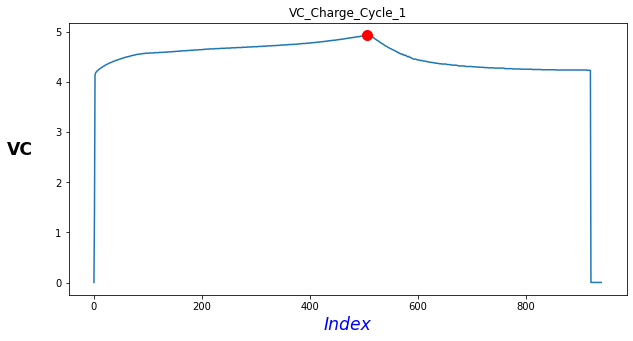

In [34]:
#可視化。マーカー付。
feature = 'VC'
data = exp_c_vc
P = P_C_VC

viz_marker(feature, data, P)

In [35]:
#充電VCの特徴量は、点P_C_VCにおける時間
Feature_VC = exp_c_vc['Time'].loc[P_C_VC]
Feature_VC

3241.8

# ④放電：VM

In [36]:
exp_d_vm = exp[['Time', 'VM']][exp['mode'] == 'Discharge']
exp_d_vm = exp_d_vm.reset_index(drop=True)
exp_d_vm.head()

,Time,VM
0,0.000,4.1915
1,16.781,4.1907
2,35.703,3.9749
3,53.781,3.9517
4,71.922,3.9344


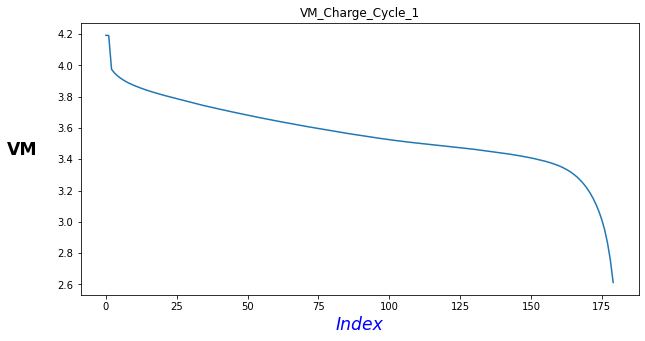

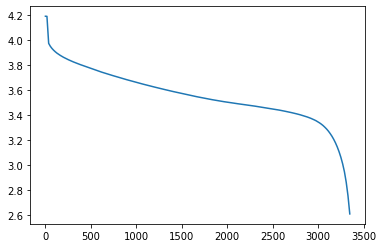

In [37]:
#可視化
feature = 'VM'
data = exp_d_vm

viz(feature, data)

In [38]:
#VMが最小値を示す点を、点P_D_VMとする。
P_D_VM = exp_d_vm.VM.argmin()
P_D_VM

179

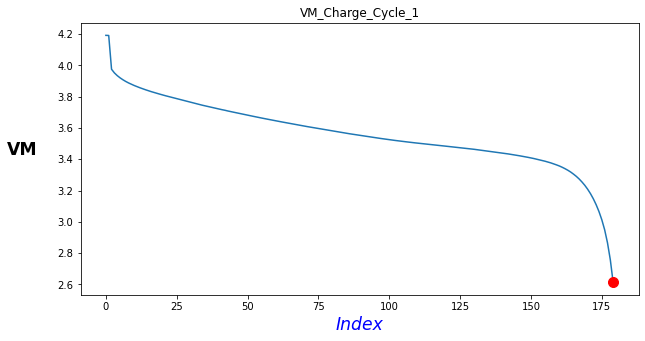

In [39]:
#可視化。マーカー付。
feature = 'VM'
data = exp_d_vm
P = P_D_VM

viz_marker(feature, data, P)

In [40]:
#放電VMの特徴量は、点P_D_VMにおける時間
Feature_VM_D = exp_d_vm['Time'].loc[P_D_VM]
Feature_VM_D

3346.9

# ⑤放電：VL

In [41]:
exp_d_vl = exp[['Time', 'VL']][exp['mode'] == 'Discharge']
exp_d_vl = exp_d_vl.reset_index(drop=True)
exp_d_vl.head()

,Time,VL
0,0.000,0.000
1,16.781,4.206
2,35.703,3.062
3,53.781,3.030
4,71.922,3.011


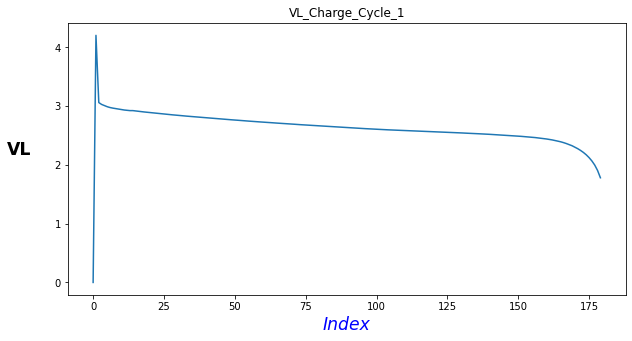

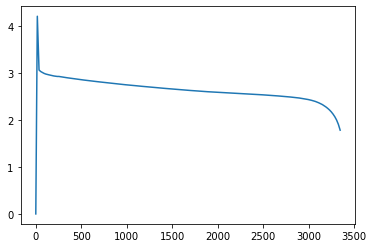

In [42]:
#可視化
feature = 'VL'
data = exp_d_vl

viz(feature, data)

In [43]:
#VLの最大値点以降の領域において、最小値を示す点を、点P_D_VLとする。
VL_max = exp_d_vl.VL.argmax()
P_D_VL = exp_d_vl.VL[VL_max: ].argmin()
P_D_VL

178

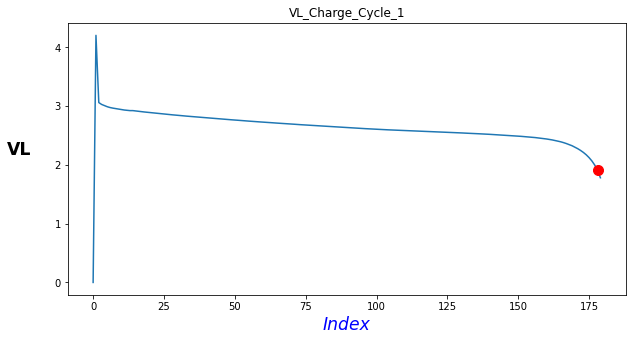

In [44]:
#可視化。マーカー付。
feature = 'VL'
data = exp_d_vl
P = P_D_VL

viz_marker(feature, data, P)

In [45]:
#放電VLの特徴量は、点P_D_VLにおける時間
Feature_VL_D = exp_d_vl['Time'].loc[P_D_VL]
Feature_VL_D

3327.2